In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split


In [8]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [9]:

# Combine train and test data to split again
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)


In [10]:

# Split into 60% training, 20% validation, and 20% testing
x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_val_flat = x_val.reshape((x_val.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))


In [14]:

# Define the different k values to test
k_values = [1, 3, 5, 10, 50, 100, 110]
train_error_rates = []
val_error_rates = []
test_error_rates = []

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
best_k = None
best_val_error_rate = float('inf')
best_test_pred = None

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn.fit(x_train_flat, y_train.ravel())

    # Predict on the training set
    y_train_pred = knn.predict(x_train_flat)
    # Predict on the validation set
    y_val_pred = knn.predict(x_val_flat)
    # Predict on the test set
    y_test_pred = knn.predict(x_test_flat)

    # Calculate accuracy on the training, validation, and test set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_error_rate = 1 - train_accuracy
    val_error_rate = 1 - val_accuracy
    test_error_rate = 1 - test_accuracy
    train_error_rates.append(train_error_rate)
    val_error_rates.append(val_error_rate)
    test_error_rates.append(test_error_rate)

    # Print results for this k
    print(f"k={k} Train Accuracy: {train_accuracy:.4f} Validation Accuracy: {val_accuracy:.4f} Test Accuracy: {test_accuracy:.4f}")
    print(f"k={k} Train Error Rate: {train_error_rate:.4f} Validation Error Rate: {val_error_rate:.4f} Test Error Rate: {test_error_rate:.4f}")

    # Update the best k based on validation error rate
    if val_error_rate < best_val_error_rate:
        best_val_error_rate = val_error_rate
        best_k = k
        best_test_pred = y_test_pred

k=1 Train Accuracy: 1.0000 Validation Accuracy: 0.3319 Test Accuracy: 0.3362
k=1 Train Error Rate: 0.0000 Validation Error Rate: 0.6681 Test Error Rate: 0.6638
k=3 Train Accuracy: 0.5698 Validation Accuracy: 0.3197 Test Accuracy: 0.3244
k=3 Train Error Rate: 0.4302 Validation Error Rate: 0.6803 Test Error Rate: 0.6756
k=5 Train Accuracy: 0.4962 Validation Accuracy: 0.3272 Test Accuracy: 0.3253
k=5 Train Error Rate: 0.5038 Validation Error Rate: 0.6727 Test Error Rate: 0.6747
k=10 Train Accuracy: 0.4208 Validation Accuracy: 0.3217 Test Accuracy: 0.3268
k=10 Train Error Rate: 0.5793 Validation Error Rate: 0.6783 Test Error Rate: 0.6732
k=50 Train Accuracy: 0.3294 Validation Accuracy: 0.3070 Test Accuracy: 0.3051
k=50 Train Error Rate: 0.6706 Validation Error Rate: 0.6930 Test Error Rate: 0.6949
k=100 Train Accuracy: 0.3062 Validation Accuracy: 0.2965 Test Accuracy: 0.2951
k=100 Train Error Rate: 0.6938 Validation Error Rate: 0.7035 Test Error Rate: 0.7049
k=110 Train Accuracy: 0.3036 Val

Best K value = 1


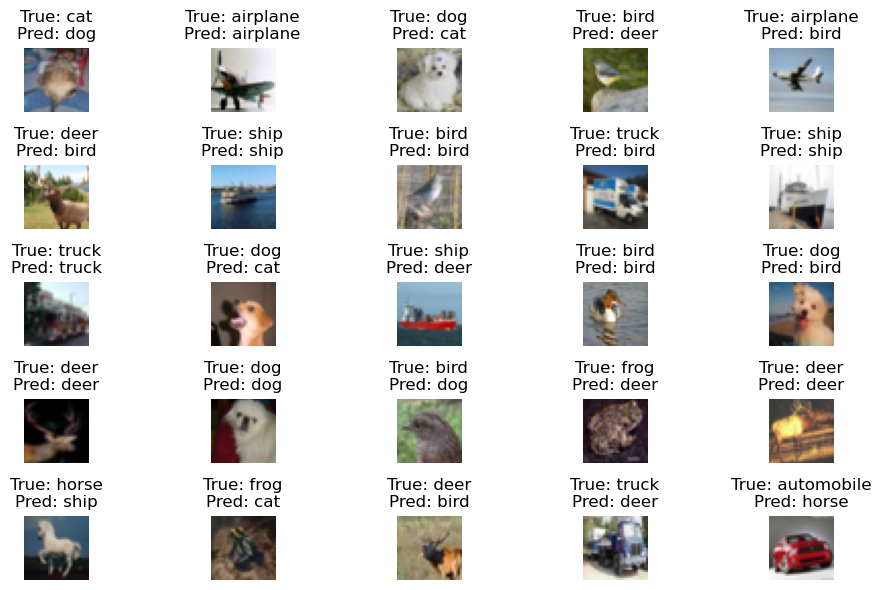

In [31]:

print(f'Best K value = {best_k}')

# Plotting 25 test images with their true and predicted labels for the best k
fig, axes = plt.subplots(5, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[best_test_pred[i]]
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


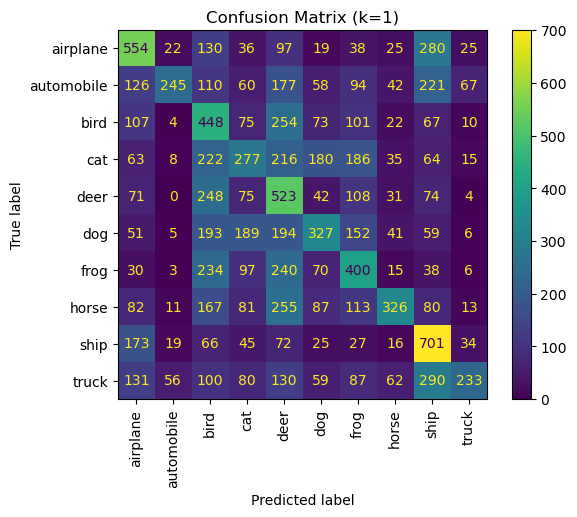

In [18]:

# Confusion Matrix for the best k
conf_matrix = confusion_matrix(y_test, best_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_names).plot(xticks_rotation='vertical')
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()


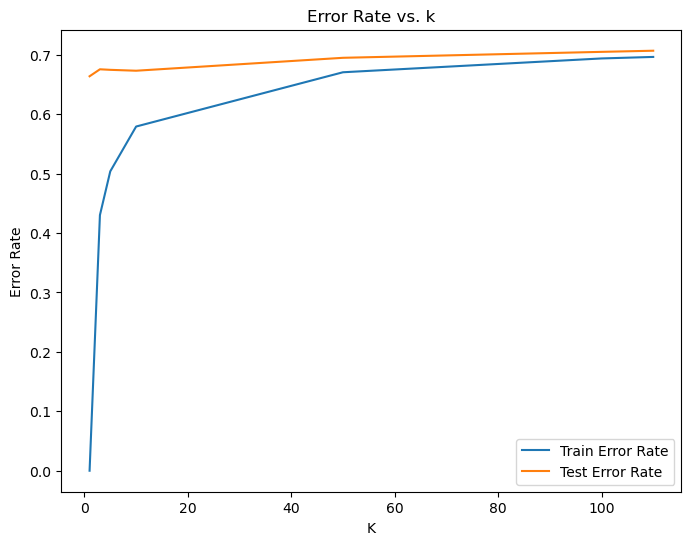

In [30]:

# Plotting Error Rates vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_error_rates, label='Train Error Rate')
plt.plot(k_values, test_error_rates, label='Test Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k')
plt.legend()
plt.show()
